In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imapipeline

In [32]:
# Load the dataset (update the filename if needed)
file_path = "HR_Data_Analysis.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())

# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())

# Get basic statistics of numerical columns
print("\nStatistical Summary of Numeric Features:")
print(df.describe())

# Check unique values in categorical columns
print("\nUnique Values in Each Column:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Check column-wise data types
print("\nColumn Data Types:")
print(df.dtypes)

# Check for any invalid or inconsistent values
print("\nChecking for Inconsistent Values:")
for col in df.columns:
    print(f"{col} unique values:", df[col].unique()[:10])  # Display first 10 unique values


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 2845 non-null   int64  
 1   StartDate                   2845 non-null   object 
 2   Title                       2845 non-null   object 
 3   BusinessUnit                2845 non-null   object 
 4   EmployeeStatus              2845 non-null   object 
 5   EmployeeType                2845 non-null   object 
 6   PayZone                     2845 non-null   object 
 7   EmployeeClassificationType  2845 non-null   object 
 8   DepartmentType              2845 non-null   object 
 9   Division                    2845 non-null   object 
 10  DOB                         2845 non-null   object 
 11  State                       2845 non-null   object 
 12  GenderCode                  2845 non-null   object 
 13  RaceDesc       

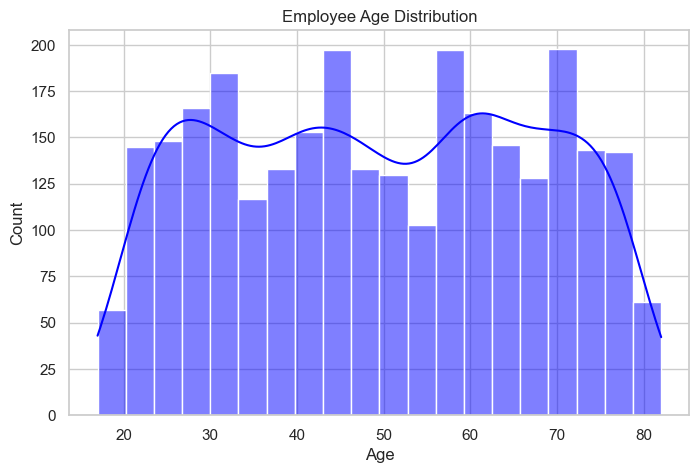

In [33]:
# Set style
sns.set_style("whitegrid")

# Histogram for age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Employee Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3740\3221382466.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["DepartmentType"], order=df["DepartmentType"].value_counts().index, palette="coolwarm")


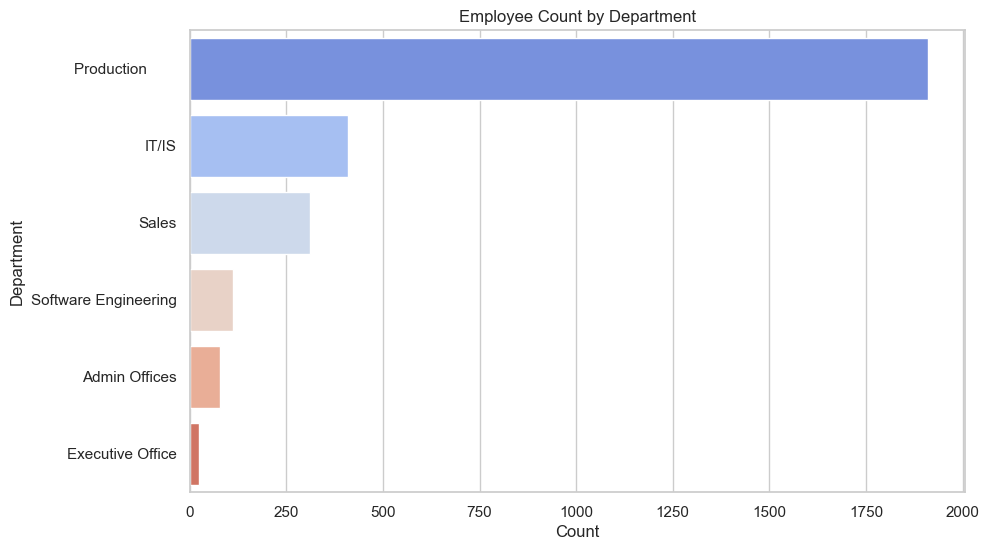

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["DepartmentType"], order=df["DepartmentType"].value_counts().index, palette="coolwarm")
plt.title("Employee Count by Department")
plt.xlabel("Count")
plt.ylabel("Department")
plt.show()


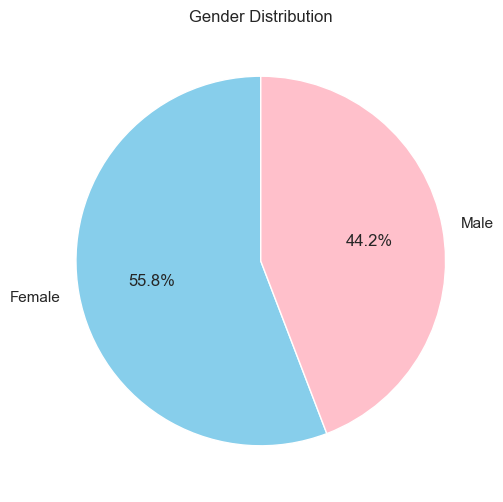

In [35]:
plt.figure(figsize=(6,6))
df["GenderCode"].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'pink', 'lightgreen'], startangle=90)
plt.title("Gender Distribution")
plt.ylabel("") # Hide y-label
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3740\2142738838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Performance Score"], palette="viridis")


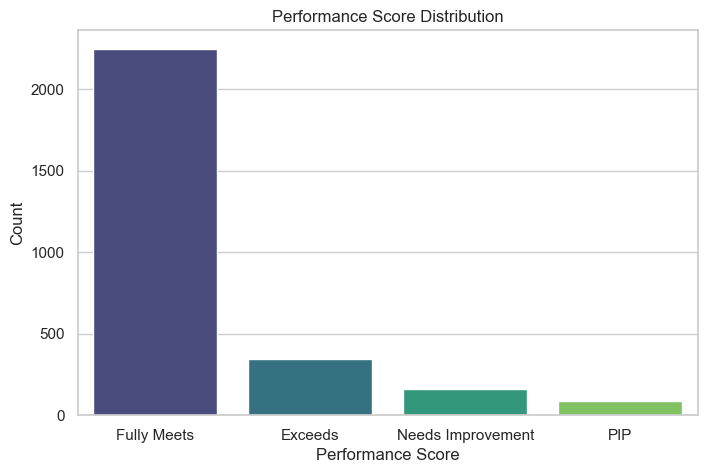

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Performance Score"], palette="viridis")
plt.title("Performance Score Distribution")
plt.xlabel("Performance Score")
plt.ylabel("Count")
plt.show()

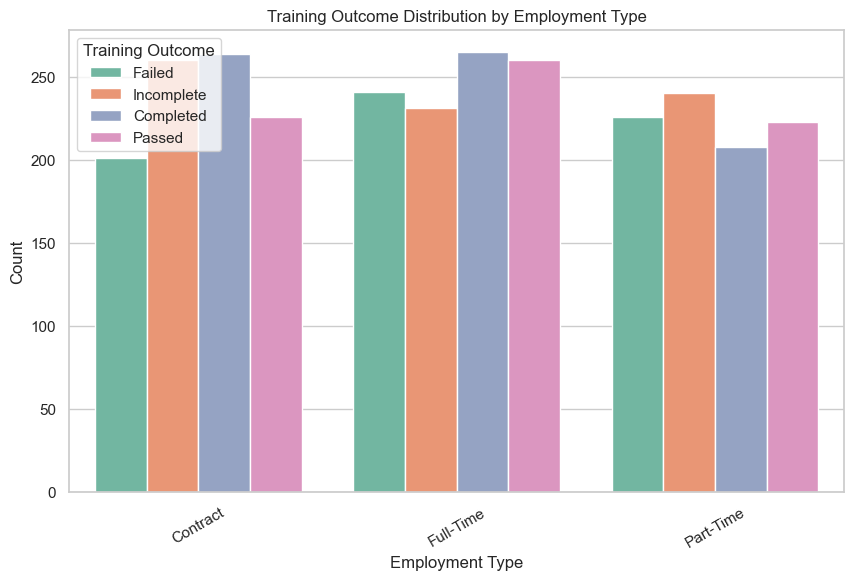

<Figure size 1000x600 with 0 Axes>

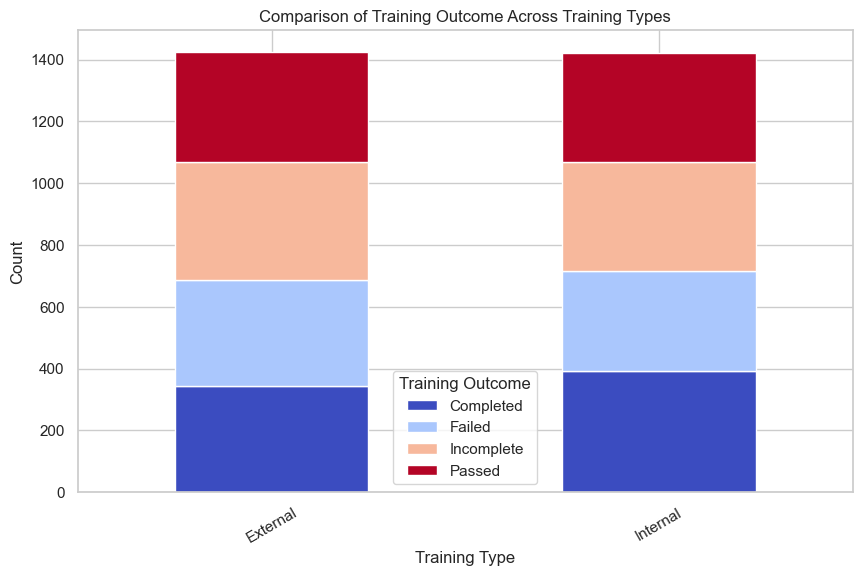

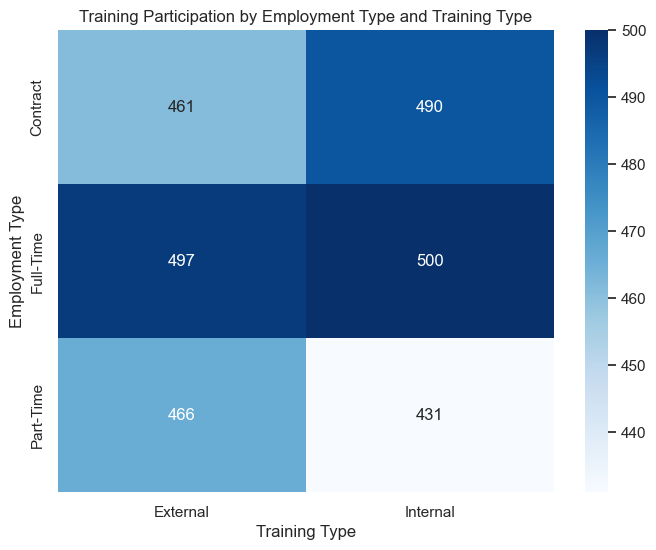

In [37]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Bar Plot: Training Outcome Distribution by Employment Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="EmployeeType", hue="Training Outcome", palette="Set2")
plt.title("Training Outcome Distribution by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.legend(title="Training Outcome")
plt.xticks(rotation=30)
plt.show()

# 2. Stacked Bar Chart: Training Outcome vs Training Type
plt.figure(figsize=(10, 6))
training_outcome_counts = df.groupby(["Training Type", "Training Outcome"]).size().unstack()
training_outcome_counts.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10, 6))
plt.title("Comparison of Training Outcome Across Training Types")
plt.xlabel("Training Type")
plt.ylabel("Count")
plt.legend(title="Training Outcome")
plt.xticks(rotation=30)
plt.show()

# 3. Heatmap: Relationship Between Employee Type, Training Type, and Training Outcome
pivot_table = df.pivot_table(index="EmployeeType", columns="Training Type", values="Training Outcome", aggfunc="count")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt=".0f")
plt.title("Training Participation by Employment Type and Training Type")
plt.xlabel("Training Type")
plt.ylabel("Employment Type")
plt.show()


In [38]:
# 1. Training Outcome Distribution by Employment Type
training_outcome_by_employment = df.groupby(["EmployeeType", "Training Outcome"]).size().unstack()
print("Training Outcome Distribution by Employment Type:")
print(training_outcome_by_employment)

# 2. Training Outcome vs Training Type
training_outcome_by_type = df.groupby(["Training Type", "Training Outcome"]).size().unstack()
print("\nComparison of Training Outcome Across Training Types:")
print(training_outcome_by_type)

# 3. Training Participation by Employment Type and Training Type
training_participation = df.pivot_table(index="EmployeeType", columns="Training Type", values="Training Outcome", aggfunc="count")
print("\nTraining Participation by Employment Type and Training Type:")
print(training_participation)

# Save tables to CSV files if needed
training_outcome_by_employment.to_csv("training_outcome_by_employment.csv")
training_outcome_by_type.to_csv("training_outcome_by_type.csv")
training_participation.to_csv("training_participation.csv")


Training Outcome Distribution by Employment Type:
Training Outcome  Completed  Failed  Incomplete  Passed
EmployeeType                                           
Contract                264     201         260     226
Full-Time               265     241         231     260
Part-Time               208     226         240     223

Comparison of Training Outcome Across Training Types:
Training Outcome  Completed  Failed  Incomplete  Passed
Training Type                                          
External                344     344         380     356
Internal                393     324         351     353

Training Participation by Employment Type and Training Type:
Training Type  External  Internal
EmployeeType                     
Contract            461       490
Full-Time           497       500
Part-Time           466       431


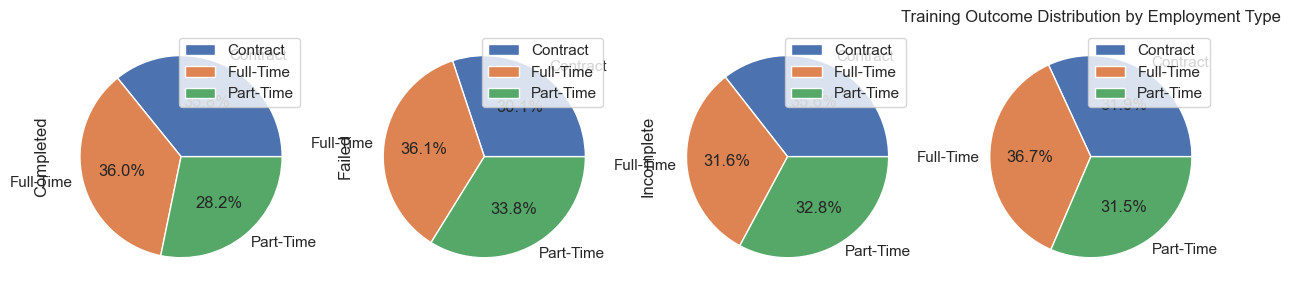

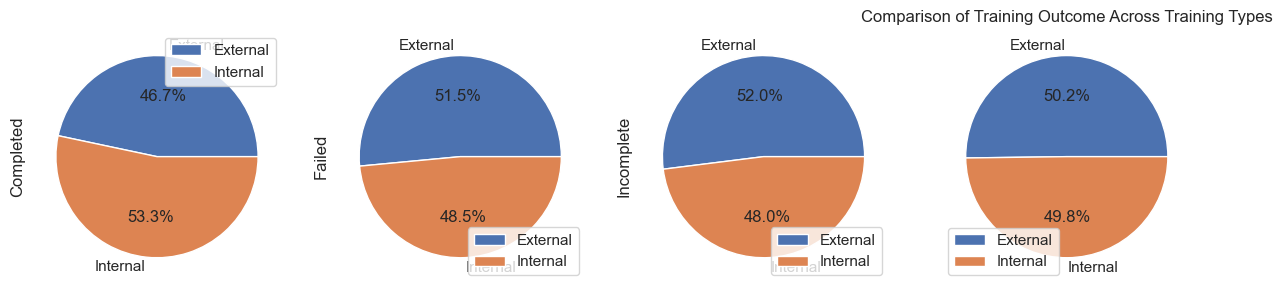

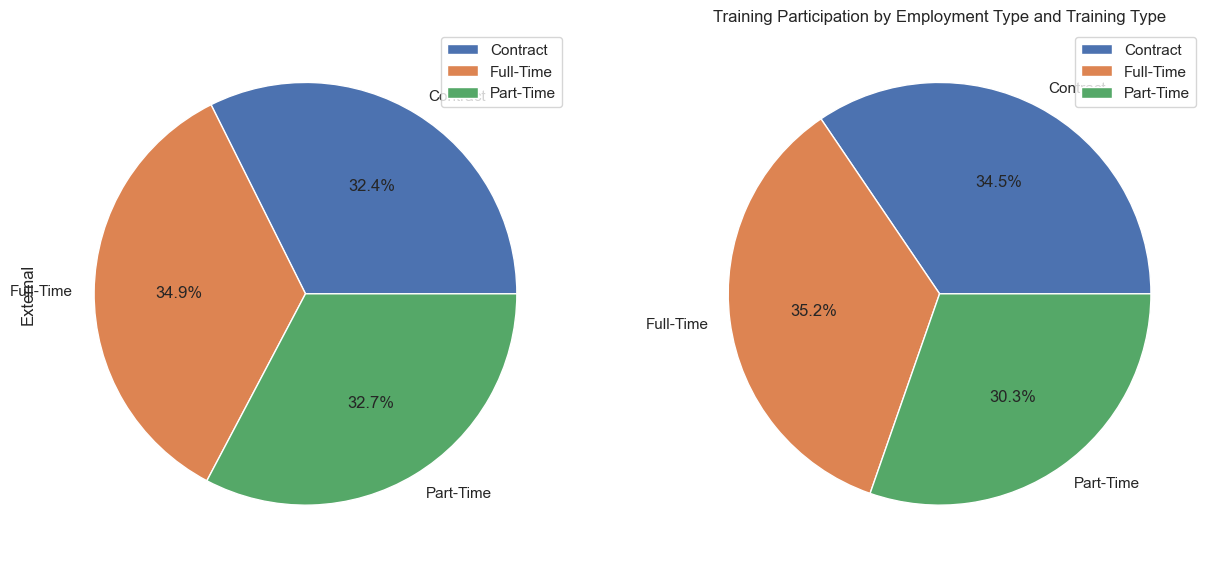

In [39]:


# 1. Training Outcome by Employment Type
training_outcome_by_employment.plot(kind="pie", subplots=True, autopct='%1.1f%%', figsize=(15, 8))
plt.title("Training Outcome Distribution by Employment Type")
plt.ylabel("")
plt.show()

# 2. Training Outcome vs. Training Type
training_outcome_by_type.plot(kind="pie", subplots=True, autopct='%1.1f%%', figsize=(15, 8))
plt.title("Comparison of Training Outcome Across Training Types")
plt.ylabel("")
plt.show()

# 3. Training Participation by Employment Type and Training Type
training_participation.plot(kind="pie", subplots=True, autopct='%1.1f%%', figsize=(15, 8))
plt.title("Training Participation by Employment Type and Training Type")
plt.ylabel("")
plt.show()


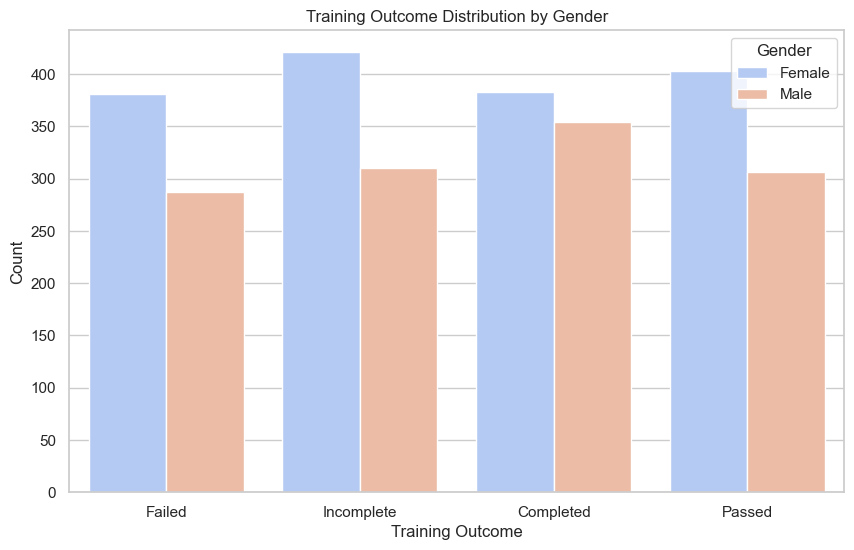

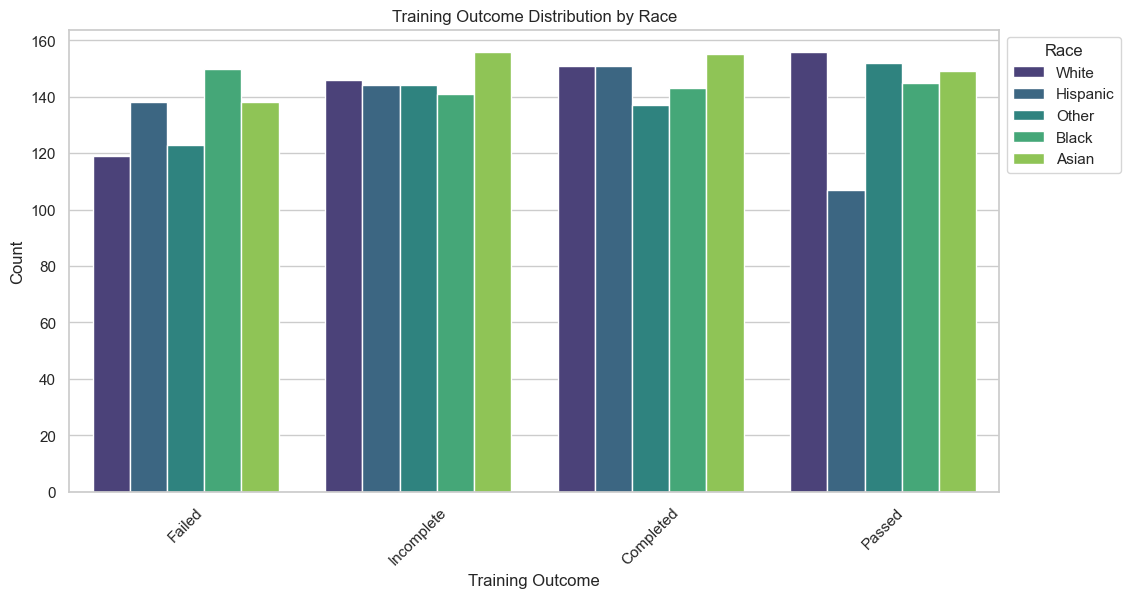

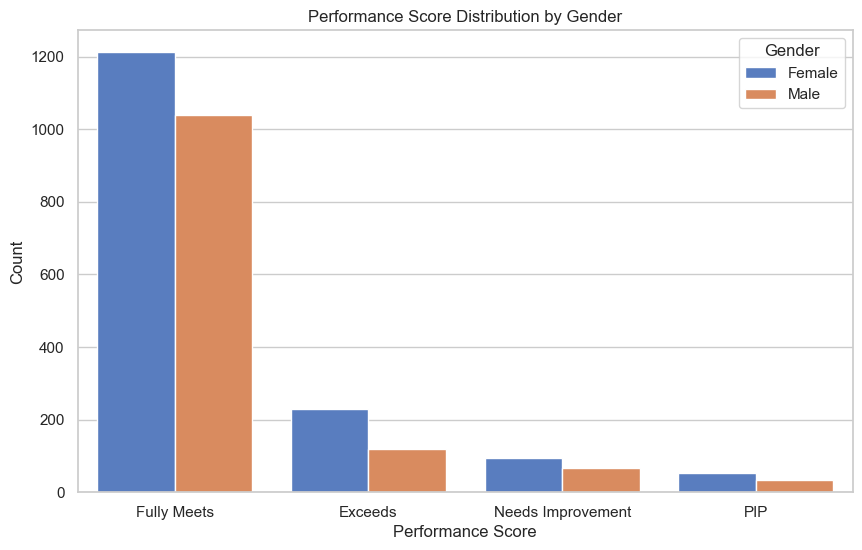

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3740\3543857576.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="RaceDesc", y="Engagement Score", palette="magma")


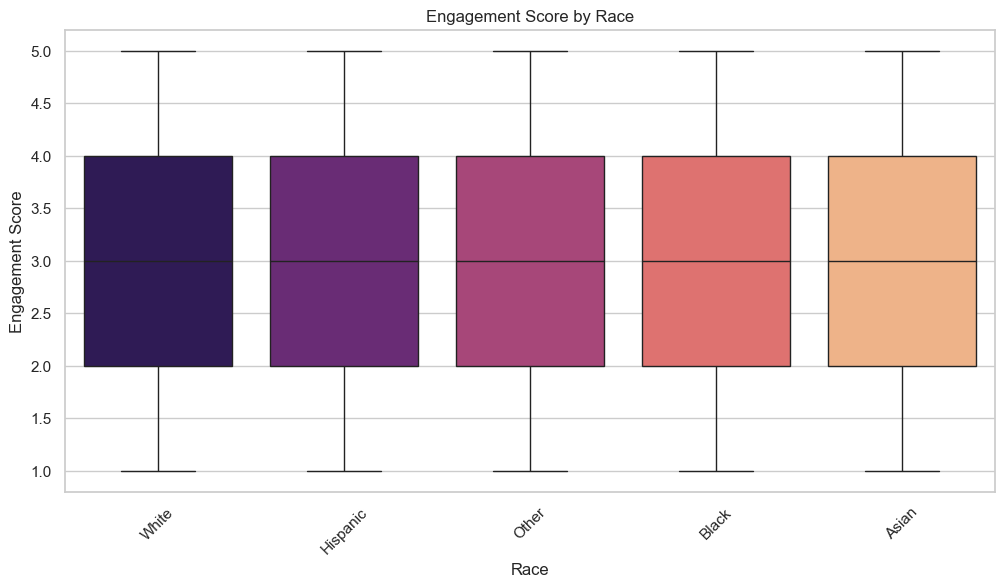

In [40]:
# Set the plot style
sns.set_style("whitegrid")

# 1. Training Outcome Distribution by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Training Outcome", hue="GenderCode", palette="coolwarm")
plt.title("Training Outcome Distribution by Gender")
plt.xlabel("Training Outcome")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

# 2. Training Outcome Distribution by Race
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Training Outcome", hue="RaceDesc", palette="viridis")
plt.title("Training Outcome Distribution by Race")
plt.xlabel("Training Outcome")
plt.ylabel("Count")
plt.legend(title="Race", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

# 3. Performance Score by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Performance Score", hue="GenderCode", palette="muted")
plt.title("Performance Score Distribution by Gender")
plt.xlabel("Performance Score")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

# 4. Engagement Score by Race
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="RaceDesc", y="Engagement Score", palette="magma")
plt.title("Engagement Score by Race")
plt.xlabel("Race")
plt.ylabel("Engagement Score")
plt.xticks(rotation=45)
plt.show()


In [41]:
# Convert StartDate and DOB to datetime objects, handling different date formats
df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Create 'Age' from DOB
df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365

# Create 'Tenure' from StartDate (years since employee started)
df['Tenure'] = (pd.to_datetime('today') - df['StartDate']).dt.days // 365

# Encode categorical columns using LabelEncoder
categorical_cols = ['GenderCode', 'EmployeeStatus', 'EmployeeType', 'PayZone', 
                    'EmployeeClassificationType', 'DepartmentType', 'Division', 
                    'RaceDesc', 'MaritalDesc', 'Performance Score', 'Training Outcome', 
                    'Training Type', 'Training Program Name']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Preview the changes
df.head()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3740\1405515643.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['StartDate'] = pd.to_datetime(df['StartDate'], errors='coerce')


,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age,Tenure
0,3427,2019-09-20,Production Technician I,CCDR,0,0,2,2,3,8,...,2,3,15-Jul-23,2,1,1,2,606.11,55.0,5
1,3428,2023-02-11,Production Technician I,EW,0,0,0,1,3,0,...,1,5,12-Sep-22,1,0,2,4,673.02,NaN,2
2,3429,2018-12-10,Area Sales Manager,PL,0,1,1,1,4,11,...,2,1,13-Aug-22,2,0,1,2,413.28,33.0,6
3,3430,2021-06-21,Area Sales Manager,CCDR,0,0,0,0,4,8,...,5,4,15-Dec-22,3,0,0,3,663.78,26.0,3
4,3431,2019-06-29,Area Sales Manager,TNS,0,0,0,2,4,9,...,5,3,13-Jul-23,4,0,1,5,399.03,NaN,5


In [42]:
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr = df_numeric.corr()

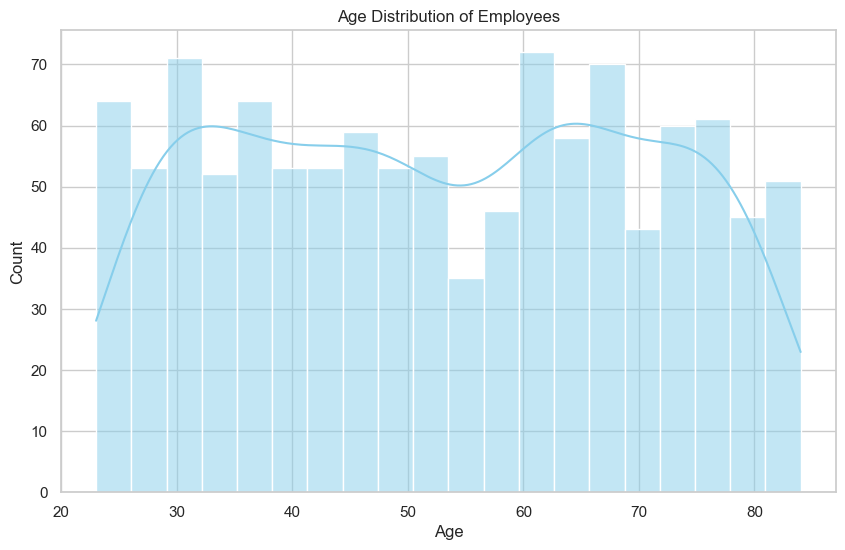

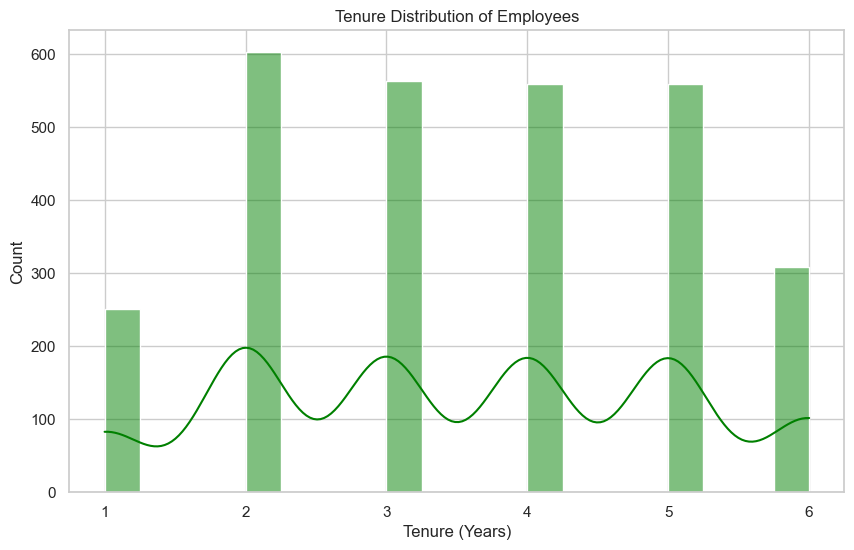

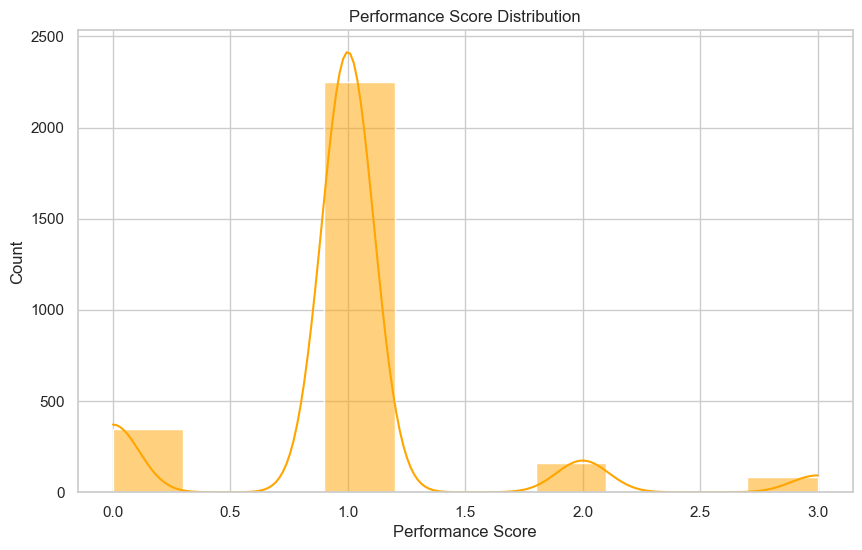

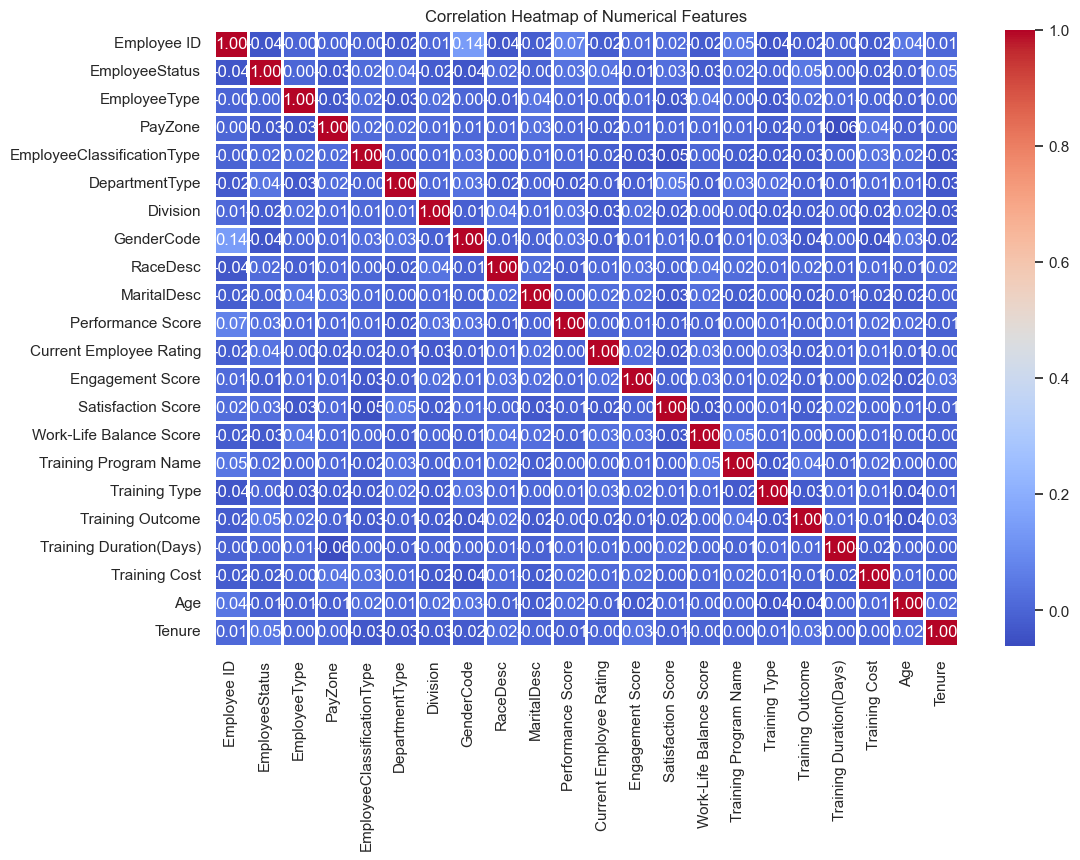

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3740\3936209012.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EmployeeStatus', y='Age', data=df, palette='Set2')


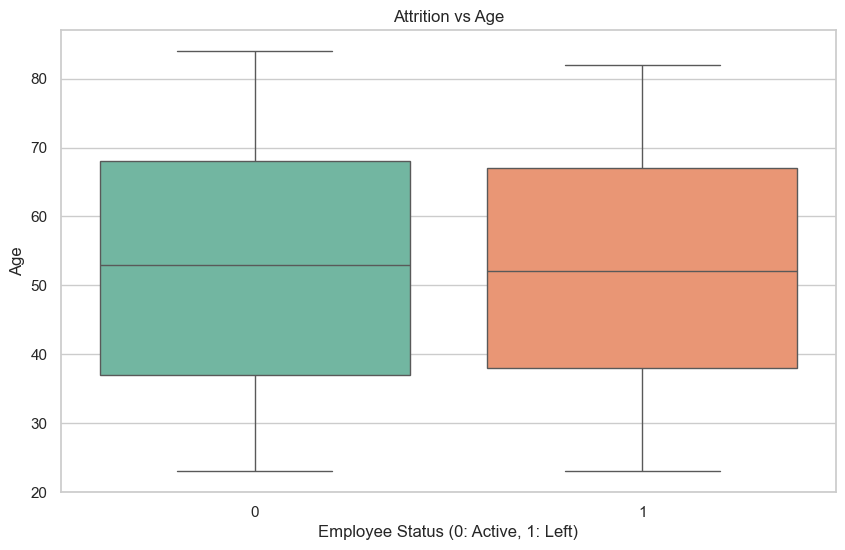

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3740\3936209012.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='EmployeeStatus', y='Tenure', data=df, palette='Set2')


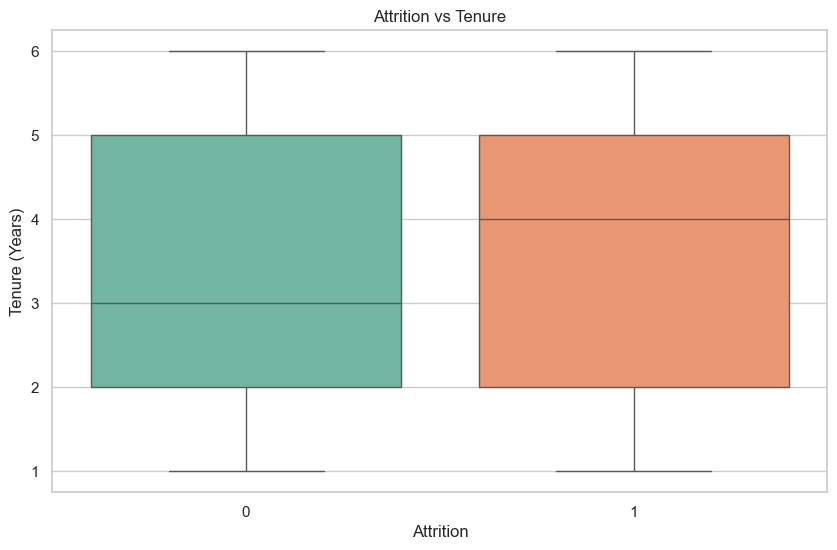

In [43]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Tenure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Tenure'], bins=20, kde=True, color='green')
plt.title('Tenure Distribution of Employees')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.show()

# 3. Performance Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Performance Score'], bins=10, kde=True, color='orange')
plt.title('Performance Score Distribution')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 5. Attrition vs. Age (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='EmployeeStatus', y='Age', data=df, palette='Set2')
plt.title('Attrition vs Age')
plt.xlabel('Employee Status (0: Active, 1: Left)')
plt.ylabel('Age')
plt.show()

# 6. Attrition vs. Tenure (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='EmployeeStatus', y='Tenure', data=df, palette='Set2')
plt.title('Attrition vs Tenure')
plt.xlabel('Attrition')
plt.ylabel('Tenure (Years)')
plt.show()

In [44]:


# Define your features and target
X = df.drop(columns=['Employee ID', 'EmployeeStatus'])  # Drop the target and any irrelevant columns
y = df['EmployeeStatus']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Define preprocessing for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Bundle preprocessing for numerical and categorical data into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optionally, tune hyperparameters with GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best Parameters:", grid_search.best_params_)
y_pred_grid = grid_search.best_estimator_.predict(X_test)
print("Accuracy (GridSearch):", accuracy_score(y_test, y_pred_grid))


Accuracy: 0.8699472759226714
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       495
           1       0.00      0.00      0.00        74

    accuracy                           0.87       569
   macro avg       0.43      0.50      0.47       569
weighted avg       0.76      0.87      0.81       569



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Accuracy (GridSearch): 0.8699472759226714


In [45]:
# Use class weights to address class imbalance
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Fit the model again
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy with Class Weights:", accuracy_score(y_test, y_pred))
print("Classification Report with Class Weights:\n", classification_report(y_test, y_pred))


Accuracy with Class Weights: 0.8699472759226714
Classification Report with Class Weights:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       495
           1       0.00      0.00      0.00        74

    accuracy                           0.87       569
   macro avg       0.43      0.50      0.47       569
weighted avg       0.76      0.87      0.81       569



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

In [46]:


# Create an SMOTE pipeline
smote = SMOTE(random_state=42)
model_smote = imapipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the SMOTE model
model_smote.fit(X_train, y_train)
y_pred_smote = model_smote.predict(X_test)

# Evaluate
print("Accuracy with SMOTE:", accuracy_score(y_test, y_pred_smote))
print("Classification Report with SMOTE:\n", classification_report(y_test, y_pred_smote))


Accuracy with SMOTE: 0.8699472759226714
Classification Report with SMOTE:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       495
           1       0.00      0.00      0.00        74

    accuracy                           0.87       569
   macro avg       0.43      0.50      0.47       569
weighted avg       0.76      0.87      0.81       569



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

Employee Attrition Prediction using Machine Learning
In this analysis, we aim to predict whether an employee will leave the company (attrition) based on various features related to their profile, work experience, and engagement within the organization. The dataset includes columns such as Employee ID, StartDate, Age, Tenure, Employee Status, Department, Gender, Performance Scores, and more.

Our goal is to classify employees into two categories:

Attrition = 0: Employees who remain with the company.
Attrition = 1: Employees who leave the company.
The model is trained on historical data where we use multiple features to predict the likelihood of an employee leaving. The classification model chosen for this task is a Random Forest Classifier, which has shown promising results for imbalanced datasets like this one.

Key steps in the approach include:

Data Preprocessing: The data is cleaned, missing values are handled, and categorical variables are encoded.
Feature Engineering: New features, such as Age (calculated from DOB) and Tenure (calculated from StartDate), are derived.
Handling Imbalance: Since the dataset is highly imbalanced (with far more employees staying than leaving), techniques like class weights and SMOTE (Synthetic Minority Oversampling Technique) are employed to improve model performance on the minority class.
Model Training: A Random Forest Classifier is trained with hyperparameter tuning to find the best model configuration.
Evaluation: Model performance is evaluated using metrics like accuracy, precision, recall, and F1-score.
Although the accuracy is high (~87%), the model struggles with correctly predicting employees who leave, which is reflected in the poor recall and F1-score for class 1. Further improvements can be made by trying different models, tuning thresholds, or employing additional balancing methods.